## Part 1: Data Cleansing and EDA
#### Step 1: Load and Inspect the Dataset
##### We begin by loading the dataset, inspecting its structure, checking for missing values, and understanding its basic statistics. This step is essential to ensure we understand the data before cleaning it.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset with appropriate column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Salary']

data = pd.read_csv('C:/Users/DELL/Downloads/adult-all.csv', header=None, names=column_names)



In [4]:
# Display the first few rows of the dataset
data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
#Check for basic information and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [269]:
# Descriptive statistics before cleaning
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## Explanation:

### We load the dataset using Pandas and assign the appropriate column names.
### The data.info() provides us with the structure, data types, and missing values in the dataset.
### The describe() function gives an overview of the numerical columns' statistics (mean, standard deviation, etc.).

## Step 2: Clean the Dataset
### Next, we clean the dataset by removing irrelevant columns (fnlwgt, education), handling missing values, and ensuring categorical labels are appropriately formatted.

In [8]:
# Clean up the column names by converting them to lowercase, removing spaces, and ensuring consistency
data.columns = (data.columns.str.strip().str.lower().str.replace(r'[ -]+', '_', regex=True).str.replace(r'[^a-z0-9_]', '', regex=True))
data.columns



Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [9]:
# Remove unnecessary columns
data_cleaned = data.drop(columns=['fnlwgt', 'education'])
data_cleaned

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
# Replace '?' with NaN and remove rows with missing values
data_cleaned = data_cleaned.replace('?', np.nan).dropna()


In [11]:
# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()


In [12]:
# Convert 'Salary' to binary labels
data_cleaned["salary"] = data_cleaned["salary"].replace({'<=50k': 'low_salary', '>50k': 'high_salary'})


In [13]:
# View cleaned dataset
data_cleaned.shape

(39240, 13)

In [14]:
data_cleaned.head(5)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Explanation:

### We dropped the fnlwgt and education columns since they do not add value to the model (education_num gives numerical representation of education).
### We handled missing values by removing rows with ? and ensured all columns have consistent formatting.
### Duplicates were removed to avoid biases in model predictions.


## Step 3: Check for Outliers
### We now check for outliers in important numerical columns like capital_gain and capital_loss. Visualizing these values allows us to identify if extreme values could negatively impact our model.

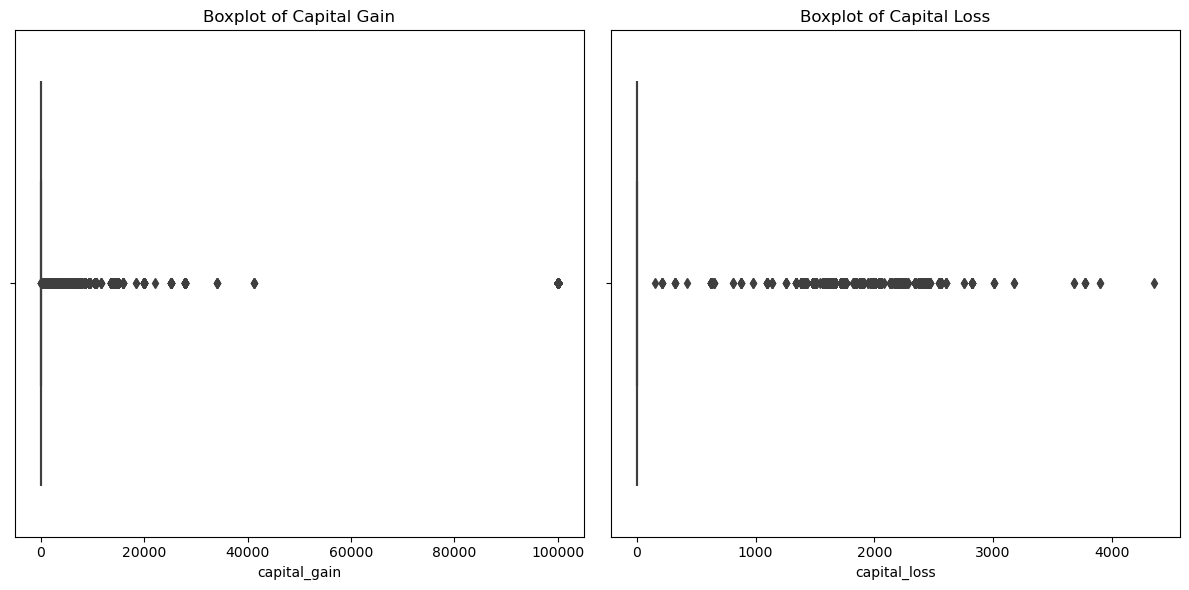

In [15]:
# Boxplot to check for outliers in capital_gain and capital_loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned["capital_gain"])
plt.title("Boxplot of Capital Gain")

plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned["capital_loss"])
plt.title("Boxplot of Capital Loss")

plt.tight_layout()
plt.show()


## Explanation:

### Boxplots help detect outliers, which are values that deviate significantly from the rest of the data. Extreme outliers can reduce the effectiveness of the model, so visualizing them is key.

## Step 4: Standardize Numerical Features

### Since features like capital_gain and capital_loss have a large range, we standardize them to reduce the influence of outliers and ensure better model performance.


In [16]:
# Standardizing 'capital_gain' and 'capital_loss'
scaler = StandardScaler()
data_cleaned[['capital_gain', 'capital_loss']] = scaler.fit_transform(data_cleaned[['capital_gain', 'capital_loss']])

# Check standardized values
print("\nStandardized values for capital_gain and capital_loss:")
print(data_cleaned[['capital_gain', 'capital_loss']].describe())


Standardized values for capital_gain and capital_loss:
       capital_gain  capital_loss
count  3.924000e+04  3.924000e+04
mean   1.638739e-17  1.665900e-17
std    1.000013e+00  1.000013e+00
min   -1.567839e-01 -2.347115e-01
25%   -1.567839e-01 -2.347115e-01
50%   -1.567839e-01 -2.347115e-01
75%   -1.567839e-01 -2.347115e-01
max    1.235264e+01  9.861969e+00


In [17]:
## Explanation

## Step 5: Exploratory Data Analysis (EDA)

### Now we perform visual analyses to understand the relationships between features and income levels. This helps us discover patterns in the data, such as how age, gender, or race correlates with income.


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


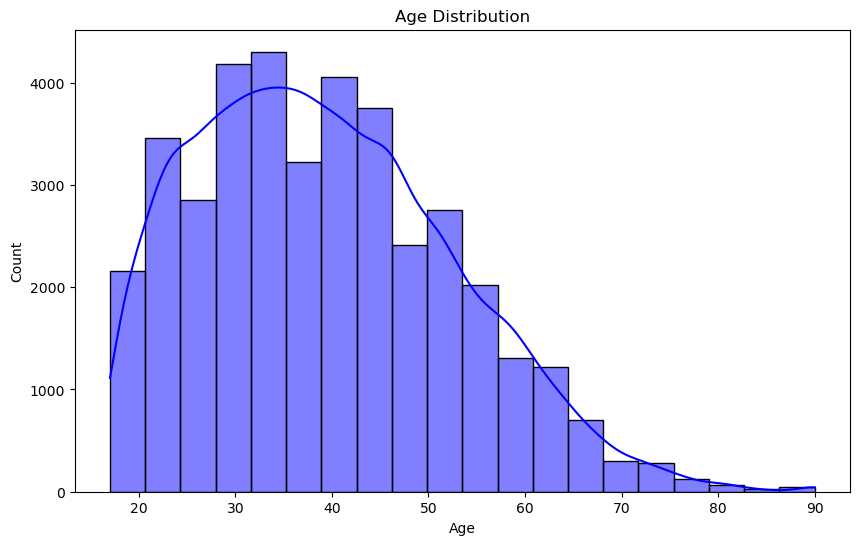

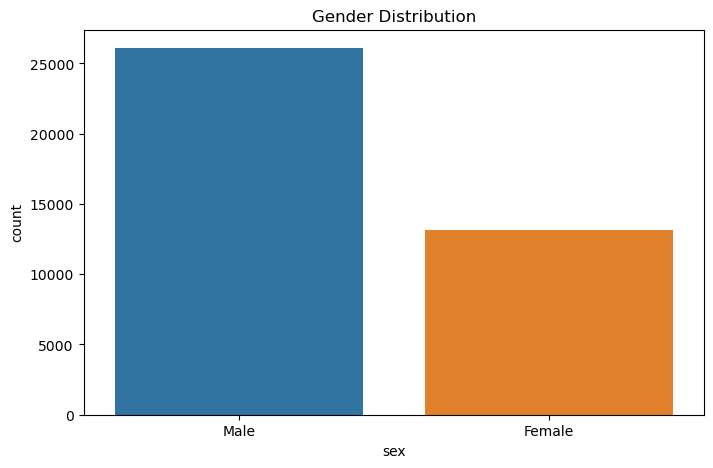

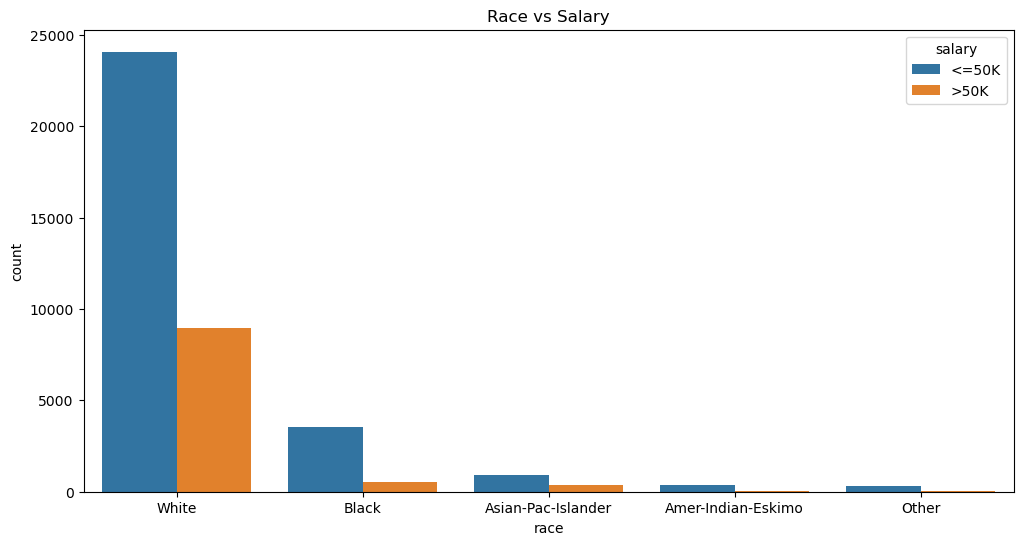

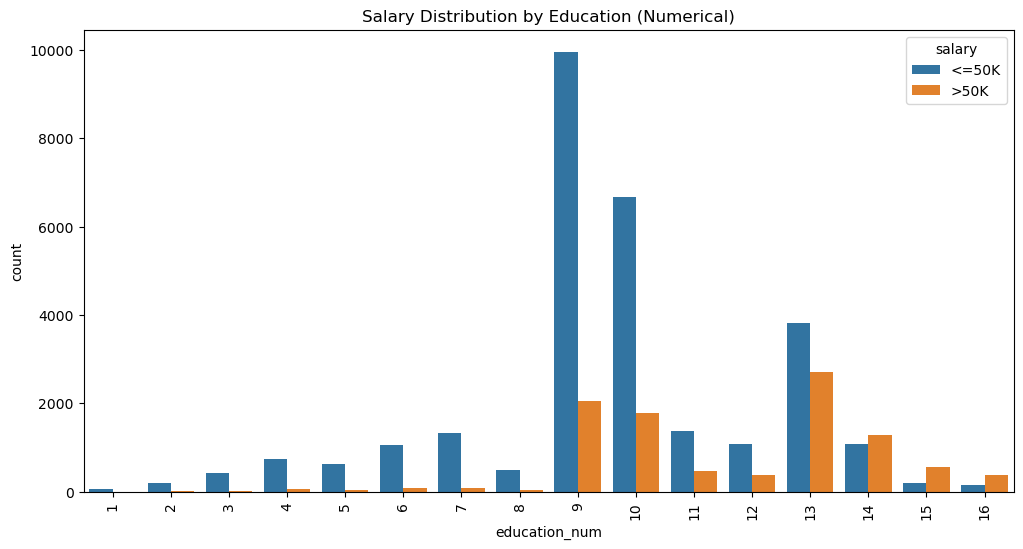

In [18]:

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='sex')
plt.title('Gender Distribution')
plt.show()

# Race vs Salary
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='salary', data=data_cleaned)
plt.title('Race vs Salary')
plt.show()

# Salary Distribution by Education Level
plt.figure(figsize=(12, 6))
sns.countplot(x='education_num', hue='salary', data=data_cleaned)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Education (Numerical)')
plt.show()


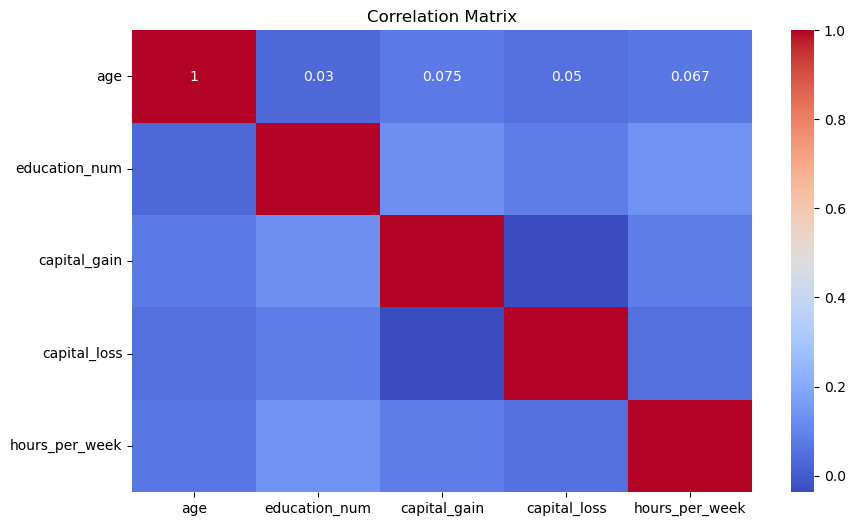

In [19]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
corr = data_cleaned[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
## Explanation

## Part 2: Building and Evaluating the KNN Model
### Step 1: Balance the Dataset

#### Before building the model, we need to check if the dataset is balanced. If the target class (salary) is imbalanced, it could negatively affect the model’s performance. Here, we use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.


In [21]:
# Check the class distribution before balancing
from collections import Counter
print(f"Class distribution before balancing: {Counter(data_cleaned['salary'])}")

Class distribution before balancing: Counter({'<=50K': 29265, '>50K': 9975})


In [22]:
# Convert target labels 'high_salary' and 'low_salary' to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['salary'])

In [23]:
# Apply one-hot encoding to categorical features
X = pd.get_dummies(data_cleaned.drop(columns=['salary']), drop_first=True)

In [24]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the new distribution of target labels after balancing
print("Class distribution after balancing:", Counter(y_balanced))

Class distribution after balancing: Counter({0: 29265, 1: 29265})


## Step 2: Build the KNN Model
### We split the dataset into training and testing sets and build the KNN model with an initial K value of 5.

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [27]:
# Build KNN model (k=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:
# Make predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (k=5): {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Accuracy (k=5): 0.8252
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      5847
           1       0.78      0.90      0.84      5859

    accuracy                           0.83     11706
   macro avg       0.83      0.83      0.82     11706
weighted avg       0.83      0.83      0.82     11706

Confusion Matrix:
 [[4400 1447]
 [ 599 5260]]


## Step 3: Find Optimal K Value
### We test different K values from 1 to 20 to find the optimal K value.


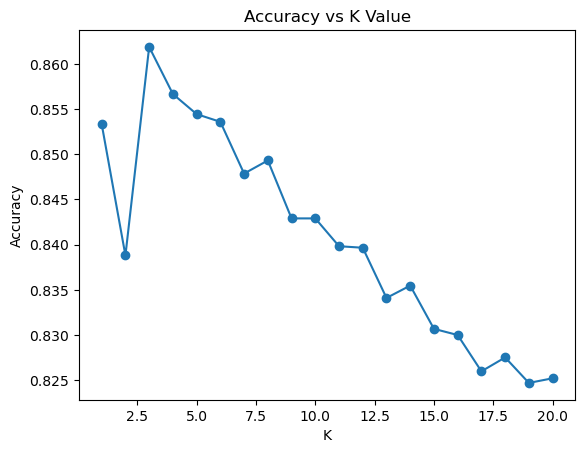

Optimal K: 3


In [32]:
# Finding the optimal K value by testing different K values (from 1 to 20)
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot accuracy vs K values
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy vs K Value')
plt.show()

# Find and print the optimal K
optimal_k = k_range[scores.index(max(scores))]
print(f"Optimal K: {optimal_k}")

## Step 4: Rebuild KNN Model with Optimal K
### After determining the optimal K, we rebuild and evaluate the KNN model.


In [33]:
# Rebuild KNN model with the optimal K value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions
y_pred_optimal = knn_optimal.predict(X_test)

# Evaluate the model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Optimal KNN Accuracy (K={optimal_k}): {accuracy_optimal:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))

Optimal KNN Accuracy (K=3): 0.8619
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      5847
           1       0.82      0.94      0.87      5859

    accuracy                           0.86     11706
   macro avg       0.87      0.86      0.86     11706
weighted avg       0.87      0.86      0.86     11706

Confusion Matrix:
 [[4606 1241]
 [ 376 5483]]
